p.185

[mpg데이터를 이용해 분석 문제를 해결]

In [1]:
# 그래프를 만들 때 사용할 mpg 데이터 불러오기
import pandas as pd
mpg = pd.read_csv('D:/WE_IT/doit/bookdata/mpg.csv')

우선 mpg 데이터에 일부러 몇 개의 값을 결측치로 만들기.

In [3]:
import numpy as np
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

Q1. drv(구동 방식)별로 hwy(고속도로 연비)평균이 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에 결측치가 있는지 확인해야 합니다. drv 변수와 hwy 변수에 결측치가 몇 개 있는지 알아보세요.

In [5]:
# 결측치 빈도 확인하기
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

Q2. df.dropna()를 이용해 hwy 변수의 결측치를 제거하고, 어떤 구동 방식의 hwy 평균이 높은지 알아보세요. 하나의 pandas 구문으로 만들어야 합니다.

In [6]:
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


p.194

우선 mpg 데이터에 일부러 몇 개의 값을 이상치로 만들기. (drv 변수의 값에 존재할 수 없는 값 k를 할당, cty 변수도 몇 개의 행에 극단적으로 크거나 작은 값을 할당
)

In [7]:
# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

Q1. drv에 이상치가 있는지 확인하세요. 이상치를 결측 처리한 다음 이상치가 사라졌는지 확인하세요. 결측 처리를 할 때는 df.isin()을 활용하세요.

In [8]:
# 이상치 확인 
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [9]:
# drv가 4,f,r이면 기존 값 유지하고 그 외에 값일 경우 NaN 부여
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)

In [10]:
# 이상치 확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
r     24
Name: count, dtype: int64

Q2. 상자 그림을 이용해 cty에 이상치가 있는지 확인하세요. 상자 그림 기준으로 정상 범위를 벗어난 값을 결측 처리한 다음 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하세요.

<Axes: ylabel='cty'>

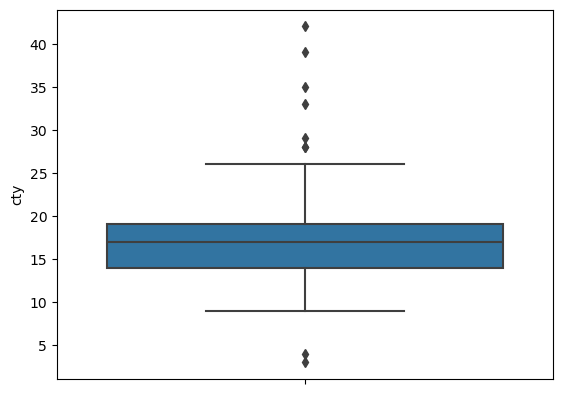

In [11]:
# 상자 그림 만들기
import seaborn as sns
sns.boxplot(data = mpg, y = 'cty')

In [13]:
# 1사분위수, 3사분위수, IQR 구하기
pct25 = mpg['cty'].quantile(.25)    # 1사분위수
pct75 = mpg['cty'].quantile(.75)    # 3사분위수
iqr = pct75 - pct25                 # iqr

# 하한, 상한 구하기
print(pct25 - 1.5 * iqr)      # 하한
print(pct75 + 1.5 * iqr)      # 상한

6.5
26.5


<Axes: ylabel='cty'>

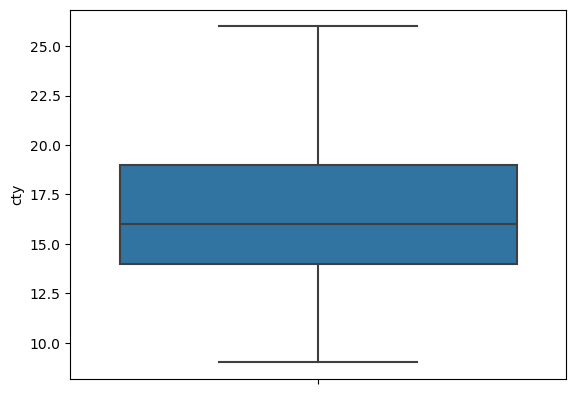

In [15]:
# 결측 처리하기 (6.5 ~ 26.5 벗어나면 NaN 부여)
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

# 상자 그림 만들기
sns.boxplot(data = mpg, y = 'cty')

Q3. 두 변수의 이상치를 결측 처리했으니 이제 분석할 차례입니다. 이상치를 제거한 다음 drv별로 cty 평균이 어떻게 다른지 알아보세요. 하나의 pandas 구문으로 만들어야 합니다.

In [16]:
# drv, cty 결측치 제거 -> drv별 분리 -> cty 평균 구하기
mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv') \
   .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
